# **SENTIMENT ANALYSIS ON POLITICAL DISCOURSE USING TWITTER DATA AHEAD OF 2020 US POLLS**

In [1]:
import tweepy as tw
import pandas as pd
from wordcloud import WordCloud
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

In [2]:
tweet_df = pd.read_csv('/content/tweets_election.csv',index_col=0)
tweet_df.head(20)

,geo,text,user,location,Subject,state
3,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
6,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
11,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
15,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
16,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota
18,NaN,'A vote for Donald Trump is a vote against the...,TMScarletFire,"Salem, MA",Donald Trump,Massachusetts
25,NaN,There is no greater supporter of Donald Trump...,mwamsley5,Ohio,Donald Trump,Ohio
29,NaN,The same people who are outraged at AOC for s...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota
30,NaN,Donald Trump is on track to become the worst ...,XchargerFan619,"San Diego, CA",Donald Trump,California
38,NaN,"It is Friday, October 30, 2020. One citizen, I...",eachlifeinplace,Iowa,Donald Trump,Iowa


Looking at the tweet texts, we notice that there are lot of characters which do not add any value towards sentiment analysis. Many of the tweets are preceeded with RT which indicates the tweet was retweeted. The tweets are also preceeded with the name of the user from whom the tweet was retweeted which is also an information we are not concerned. We also remove any html website links which maybe present inside the tweet. All of these data cleaning are done with the help of the re built-in package of Python.

In [3]:
import re
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  return text

In [4]:
tweet_df['text'] = tweet_df['text'].apply(lambda x: clean_tweets(x))
tweet_df.head(20)

,geo,text,user,location,Subject,state
3,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
6,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
11,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
15,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
16,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota
18,NaN,'A vote for Donald Trump is a vote against the...,TMScarletFire,"Salem, MA",Donald Trump,Massachusetts
25,NaN,There is no greater supporter of Donald Trump...,mwamsley5,Ohio,Donald Trump,Ohio
29,NaN,The same people who are outraged at AOC for s...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota
30,NaN,Donald Trump is on track to become the worst ...,XchargerFan619,"San Diego, CA",Donald Trump,California
38,NaN,"It is Friday, October 30, 2020. One citizen, I...",eachlifeinplace,Iowa,Donald Trump,Iowa


In this analysis, we are mostly concerned with finding the political mood of each and every US state currently from the twitter data. In order to do this, we need to do some more filtering with the original data which we extracted from the tweepy API. As we discussed before, the tweepy API provides us with the location of the user who made the tweet provided he/she is sharing this information with us. This location data is mostly blank. For others, it may consist of the country name only, city name only or the city and state separated by a comma and so on.

In the next part, we form a list of US states and another list of US state codes in order to extract tweets which contain these in the location record. 

P.S. This is a very naive way to do this cleansing. A much better way would have been to use the Google Maps API and get the state information from the location data provided it was in United States of America. However, due to problems with my Google Maps Billing Account, I had to contend myself with the naive way.

In [5]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii',
          'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
          'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New York', 'New Mexico', 'North Carolina',
          'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
          'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
stateCodes = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
              'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
              'WA', 'WV', 'WI', 'WY']
stateMapping = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 
                  'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 
                  'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 
                  'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 
                  'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 
                  'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NY': 'New York', 
                  'NM': 'New Mexico', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 
                  'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
                  'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT':  'Utah', 'VT': 'Vermont', 
                  'VA': 'Virginia', 'WA': 'Washington', 'WV':  'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}
tweet_copied_df = tweet_df
for index, row in tweet_df.iterrows():
  flag = 0
  if row.location:
    locationSplit = row.location.split(',')
    for word in locationSplit:
      word_stripped = word.strip()
      if word_stripped in states:
        flag = 1
        row['state'] = word_stripped
      elif word_stripped in stateCodes:
        flag = 1
        row['state'] = stateMapping[word_stripped]
  if flag == 0:
    tweet_copied_df = tweet_copied_df.drop(index=index)
  else:
    tweet_copied_df.loc[index, 'state'] = row['state']

At the end, we append the cleaned data to an existing csv file to create a corpus of twitter data on which we will use our sentiment analyser. For the purposes of this project, I ran the above lines of code in a loop with an interval of 15 minutes in between every iteration.

In [6]:
tweet_copied_df.to_csv('tweets_election.csv', header=False, mode='a')

# Sentiment Analysis

We use the VADER Sentiment Analyzer in order to perform the sentiment analysis. According to GeeksforGeeks, VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. A sentiment lexicon is a list of lexical features, in simpler terms words which are generally labeled according to their semantic orientation as either positive or negative. VADER not only categorizes a sentiment as positive or negative but also tells us how positive or negative a sentiment is.

In [8]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [9]:
sid = SentimentIntensityAnalyzer()

Next up, we separate out the tweets of the two candidates into separate dataframes.

In [10]:
tweets_election_df = pd.read_csv('tweets_election.csv')
tweets_trump = tweets_election_df[tweets_election_df.Subject == 'Donald Trump']
tweets_trump.drop(tweets_trump.columns[0], axis=1, inplace = True)
tweets_trump.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,geo,text,user,location,Subject,state
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota


In [11]:
tweets_biden = tweets_election_df[tweets_election_df.Subject == 'Joe Biden']
tweets_biden.drop(tweets_biden.columns[0], axis=1, inplace = True)
tweets_biden.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,geo,text,user,location,Subject,state
2928,NaN,Unfortunately she along with other politicia...,gmollo1115,"Georgia, USA",Joe Biden,Georgia
2929,NaN,Let’s talk about the Hunter laptop and such. ...,mcritter61,"Houston, TX",Joe Biden,Texas
2930,NaN,Fun to think about how we learned today that ...,1kingsbay,"on the river, FL",Joe Biden,Florida
2931,NaN,Larry Kudlow: Joe Biden's economic plan would...,JanedgeJanis,"Texas, USA",Joe Biden,Texas
2932,NaN,A 64-page document asserting an elaborate con...,denopotter,"Dallas, TX",Joe Biden,Texas


Text(0.5, 1.0, 'Comparison of Twitter mentions of both candidates in all US states as per data collected')

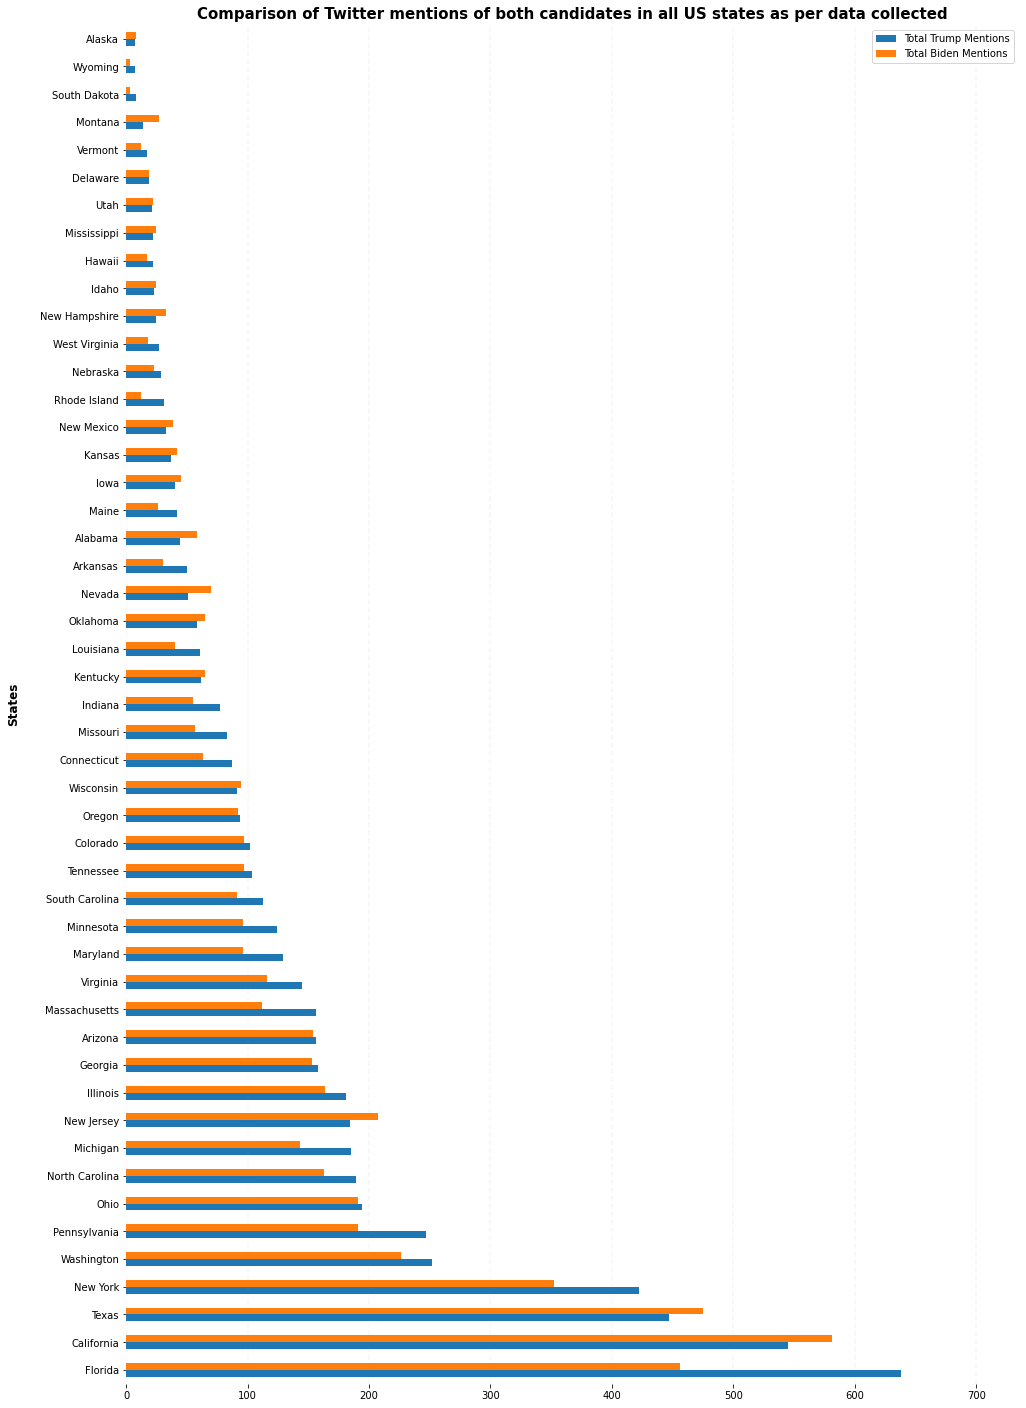

In [12]:
df = pd.merge(tweets_trump['state'].value_counts(), tweets_biden['state'].value_counts(), right_index = True, 
               left_index = True)
df = df.rename(columns = {"state_x": "Total Trump Mentions", "state_y": "Total Biden Mentions"})
ax = df.plot(kind='barh', figsize=(16, 25), zorder=2)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Replacing ticks with horizontal lines
#ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set y-axis label
ax.set_ylabel("States", labelpad=20, weight='bold', size=12)
ax.set_title('Comparison of Twitter mentions of both candidates in all US states as per data collected',fontweight="bold", size=15)

The above graphic shows a huge shortcoming of our analysis. Our dataset, like many other datasets is not a well distributed dataset. This means we have some states like Florida, California, Texas which have more data than others. Also, it seems that the amount of data related to Trump exceeds Biden's data by a small margin.

We proceed with our sentiment analysis now. To start off, we apply the polarity_scores() method to every tweet text in order to understand the sentiment of the tweet. The result of this method call is a dictionary showing the intensity of negative, neutral and positive sentiment in the tweet. All these three values are used to create the fourth figure which is the overall compound sentiment of the tweet. We will use this figure to judge whether the sentiment of a tweet is positive, negative or neutral.

In [13]:
tweets_trump['sentiment'] = tweets_trump['text'].apply(lambda x: sid.polarity_scores(x))
tweets_biden['sentiment'] = tweets_biden['text'].apply(lambda x: sid.polarity_scores(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [15]:
tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_trump.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,geo,text,user,location,Subject,state,sentiment,sentiment_overall
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,Donald Trump,New Jersey,"{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'comp...",Negative
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",Donald Trump,Texas,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp...",Negative
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...",Positive
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",Donald Trump,New Jersey,"{'neg': 0.251, 'neu': 0.566, 'pos': 0.184, 'co...",Negative
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'co...",Positive
5,NaN,'A vote for Donald Trump is a vote against the...,TMScarletFire,"Salem, MA",Donald Trump,Massachusetts,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",Positive
6,NaN,There is no greater supporter of Donald Trump...,mwamsley5,Ohio,Donald Trump,Ohio,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'co...",Positive
7,NaN,The same people who are outraged at AOC for s...,SpeakBravely,"Twin Cities, Minnesota",Donald Trump,Minnesota,"{'neg': 0.299, 'neu': 0.613, 'pos': 0.088, 'co...",Negative
8,NaN,Donald Trump is on track to become the worst ...,XchargerFan619,"San Diego, CA",Donald Trump,California,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...",Negative
9,NaN,"It is Friday, October 30, 2020. One citizen, I...",eachlifeinplace,Iowa,Donald Trump,Iowa,"{'neg': 0.0, 'neu': 0.93, 'pos': 0.07, 'compou...",Positive


In [16]:
tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_biden.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,geo,text,user,location,Subject,state,sentiment,sentiment_overall
2928,NaN,Unfortunately she along with other politicia...,gmollo1115,"Georgia, USA",Joe Biden,Georgia,"{'neg': 0.341, 'neu': 0.659, 'pos': 0.0, 'comp...",Negative
2929,NaN,Let’s talk about the Hunter laptop and such. ...,mcritter61,"Houston, TX",Joe Biden,Texas,"{'neg': 0.146, 'neu': 0.758, 'pos': 0.096, 'co...",Negative
2930,NaN,Fun to think about how we learned today that ...,1kingsbay,"on the river, FL",Joe Biden,Florida,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",Positive
2931,NaN,Larry Kudlow: Joe Biden's economic plan would...,JanedgeJanis,"Texas, USA",Joe Biden,Texas,"{'neg': 0.127, 'neu': 0.873, 'pos': 0.0, 'comp...",Negative
2932,NaN,A 64-page document asserting an elaborate con...,denopotter,"Dallas, TX",Joe Biden,Texas,"{'neg': 0.159, 'neu': 0.841, 'pos': 0.0, 'comp...",Negative
2933,NaN,He is a profoundly decent man: a man of faith...,afquillen,"Crossville, Tennessee",Joe Biden,Tennessee,"{'neg': 0.0, 'neu': 0.669, 'pos': 0.331, 'comp...",Positive
2934,NaN,"Every CNN show should end with ""I'm Joe Biden...",sistertoldjah,"Charlotte, North Carolina",Joe Biden,North Carolina,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",Positive
2935,NaN,"Rest assured, that’s my best friend who wrot...",JFJMayer8,"Oregon, USA",Joe Biden,Oregon,"{'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'comp...",Positive
2936,NaN,"Winston Churchill’s granddaughter, Edwina San...",jerryChromeX,"Texas, USA",Joe Biden,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2937,NaN,If Sleepy Joe Biden is actually elected Presi...,weisarts,"San Francisco, CA",Joe Biden,California,"{'neg': 0.112, 'neu': 0.717, 'pos': 0.17, 'com...",Positive


Now that we have classified every tweet data as either positive, negative or neutral, we can group by state and understand the general opinion of the public of that state regarding a particular candidate. This is our next course of action.

In [17]:
tweets_trump_location = tweets_trump.groupby(['state', 'sentiment_overall']).count()
tweets_trump_location = tweets_trump_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_trump_location)

state           sentiment_overall
Alabama         Negative              15
                Neutral               15
                Positive              14
Alaska          Negative               3
                Neutral                1
                Positive               3
Arizona         Negative              57
                Neutral               52
                Positive              47
Arkansas        Negative              10
                Neutral               17
                Positive              23
California      Negative             196
                Neutral              132
                Positive             217
Colorado        Negative              40
                Neutral               25
                Positive              37
Connecticut     Negative              28
                Neutral               29
                Positive              30
Delaware        Negative               6
                Neutral                7
                Positiv

In [ ]:
#tweets_biden['sentiment_overall']
def exp_graph(review,title):   
    group = review.groupby('sentiment_overall').count()
    Pol_count = list(group['sentiment'])
    Exp = list(group.index)

    group_list = list(zip(Pol_count,Exp))

    df = pd.DataFrame(group_list, columns=['Pol_count','Exp'])

    df['color'] = 'rgb(14,185,54)'
    df.loc[df.Exp == 'Netural', 'color'] = 'rgb(18,29,31)'
    df.loc[df.Exp == 'Negative', 'color'] = 'rgb(206,31,31)'
    
    go.Figure(go.Bar(x=df['Pol_count'],
                    y=df['Exp'],orientation='h',
                    marker={'color':df['color']})).update_layout(title_text=title).show()

In [ ]:
exp_graph(tweets_biden,'bidden\'s Review Analysis')


In [ ]:
exp_graph(tweets_trump,'Trump\'s Review Analysis')


In [ ]:
tweets_biden.groupby('sentiment_overall').count()


,geo,text,user,location,Subject,state,sentiment
sentiment_overall,,,,,,,
Negative,0,1820,1820,1820,1820,1820,1820
Neutral,0,1574,1574,1574,1574,1574,1574
Positive,0,1856,1856,1856,1856,1856,1856


In [ ]:
tweets_trump.groupby('sentiment_overall').count()


,geo,text,user,location,Subject,state,sentiment
sentiment_overall,,,,,,,
Negative,0,2078,2078,2078,2078,2078,2078
Neutral,0,1660,1660,1660,1660,1660,1660
Positive,0,2118,2118,2118,2118,2118,2118


In [ ]:
def balanced_data(reviews,n):
    np.random.seed(10)
    drop = np.random.choice(reviews.index,n,replace=False)
    review_subset = reviews.drop(drop)
    return review_subset

In [ ]:
tweets_trump = balanced_data(tweets_trump,606)
print(tweets_trump.shape)

tweets_biden = balanced_data(tweets_biden,0)
print(tweets_biden.shape)


(5250, 8)
(5250, 8)


In [ ]:
def pol_percent(subset,total):
    neg_percent = ((subset.groupby('sentiment_overall').count())['sentiment'][0]/total)*100
    pos_percent = ((subset.groupby('sentiment_overall').count())['sentiment'][1]/total)*100
    
    return neg_percent,pos_percent


In [ ]:
trump_pol_percent = pol_percent(tweets_trump,5250)
trump_pol_percent
biden_pol_percent = pol_percent(tweets_biden,5250)
biden_pol_percent

(34.66666666666667, 29.98095238095238)

In [ ]:
# word cloud 

def wordcloud(data,title):
    text = str(data.text)
    wc = WordCloud(max_font_size=100,max_words=500,scale=10,relative_scaling=0.6,background_color='white').generate(text)

    plt.figure(figsize=(15,10))
    plt.title(title,{'fontsize':30,'family':'serif'})
    plt.axis('off')
    plt.imshow(wc)

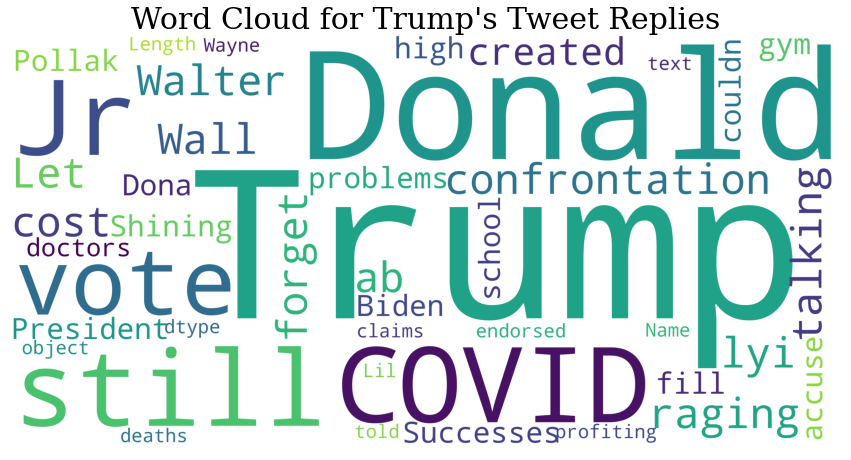

In [ ]:
wordcloud(tweets_trump,'Word Cloud for Trump\'s Tweet Replies')


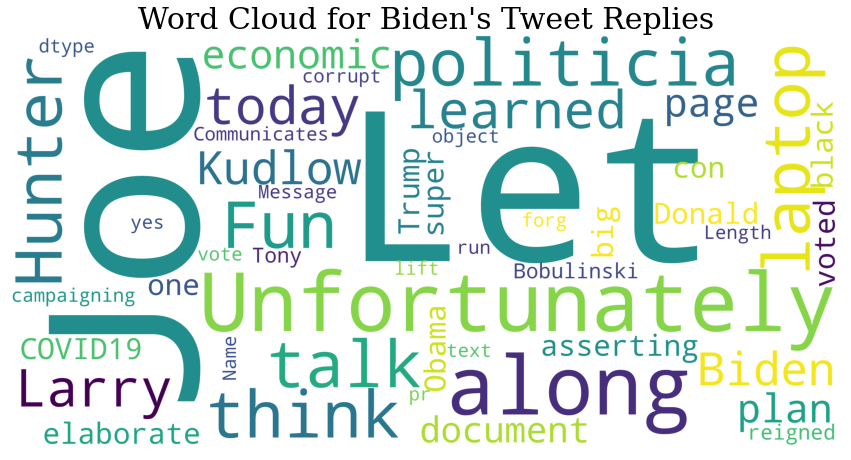

In [ ]:
#wordcloud for Biden
wordcloud(tweets_biden,'Word Cloud for Biden\'s Tweet Replies')

In [18]:
tweets_biden_location = tweets_biden.groupby(['state', 'sentiment_overall']).count()
tweets_biden_location = tweets_biden_location['user']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_biden_location)

state           sentiment_overall
Alabama         Negative              21
                Neutral               19
                Positive              18
Alaska          Negative               3
                Neutral                3
                Positive               2
Arizona         Negative              56
                Neutral               42
                Positive              56
Arkansas        Negative               7
                Neutral               11
                Positive              12
California      Negative             233
                Neutral              155
                Positive             193
Colorado        Negative              31
                Neutral               32
                Positive              34
Connecticut     Negative              24
                Neutral               21
                Positive              18
Delaware        Negative               7
                Neutral                4
                Positiv

In [ ]:
tweets_location_df = pd.DataFrame({'State': [state for state in states],
                                         'Trump Positive': [0 for state in states],
                                         'Trump Negative': [0 for state in states],
                                         'Trump Neutral': [0 for state in states],
                                         'Trump Total': [0 for state in states],
                                         'Biden Positive': [0 for state in states],
                                         'Biden Negative': [0 for state in states],
                                         'Biden Neutral': [0 for state in states],
                                         'Biden Total': [0 for state in states]})
tweets_location_df.set_index('State', inplace = True)
for state in states:
  positiveTrump, negativeTrump, neutralTrump, positiveBiden, negativeBiden, neutralBiden = 0, 0, 0, 0, 0, 0
  try:
    positiveTrump = tweets_trump_location[state]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[state]['Negative']
  except:
    negativeTrump = 0
  
  try:
    neutralTrump = tweets_trump_location[state]['Neutral']
  except:
    neutralTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[state]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[state]['Negative']
  except:
    negativeBiden = 0
  
  try:
    neutralBiden = tweets_biden_location[state]['Neutral']
  except:
    neutralBiden = 0

  totalTrump = positiveTrump + negativeTrump + neutralTrump
  totalBiden = positiveBiden + negativeBiden + neutralBiden

  if totalTrump == 0:
    tweets_location_df.at[state, 'Trump Positive'], tweets_location_df.at[state, 'Trump Negative'], tweets_location_df.at[state, 'Trump Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Trump Positive'] = round((positiveTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Negative'] = round((negativeTrump/totalTrump)*100.0)
    tweets_location_df.at[state, 'Trump Neutral'] = round((neutralTrump/totalTrump)*100.0)
  tweets_location_df.at[state, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[state, 'Biden Positive'], tweets_location_df.at[state, 'Biden Negative'], tweets_location_df.at[state, 'Biden Neutral'] = 0,0,0
  else:
    tweets_location_df.at[state, 'Biden Positive'] = round((positiveBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Negative'] = round((negativeBiden/totalBiden)*100.0)
    tweets_location_df.at[state, 'Biden Neutral'] = round((neutralBiden/totalBiden)*100.0)
  tweets_location_df.at[state, 'Biden Total'] = totalBiden
tweets_location_df



,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
State,,,,,,,,
Alabama,32,34,34,44,31,36,33,58
Alaska,43,43,14,7,25,38,38,8
Arizona,30,37,33,156,36,36,27,154
Arkansas,46,20,34,50,40,23,37,30
California,40,36,24,545,33,40,27,581
Colorado,36,39,25,102,35,32,33,97
Connecticut,34,32,33,87,29,38,33,63
Delaware,32,32,37,19,42,37,21,19
Florida,38,33,29,638,33,33,35,456


In [ ]:
tweets_location_df['Predicted Judgement'] = 'Neutral'
for index, row in tweets_location_df.iterrows():
  if row['Trump Total'] <= 15 and row['Biden Total'] <= 15:
    tweets_location_df.loc[index, 'Predicted Judgement'] = 'Insufficient Data'
  else:
    if row['Trump Positive'] > row['Biden Positive'] and (row['Trump Negative'] < row['Biden Negative'] or row['Trump Neutral'] > row['Biden Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Republican'
    elif row['Biden Positive'] > row['Trump Positive'] and (row['Biden Negative'] < row['Trump Negative'] or row['Biden Neutral'] > row['Trump Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Democratic'
    elif row['Trump Positive'] - row['Biden Positive'] > row['Biden Negative'] - row['Trump Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Republican'
    elif row['Biden Positive'] - row['Trump Positive'] > row['Trump Negative'] - row['Biden Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Democratic'
tweets_location_df = tweets_location_df.rename(columns={'Trump Positive': 'Trump Positive (in %)', 
                                                        'Trump Negative': 'Trump Negative (in %)',
                                                        'Trump Neutral': 'Trump Neutral (in %)',
                                                        'Trump Total': 'Trump Total Mentions',
                                                        'Biden Positive': 'Biden Positive (in %)',
                                                        'Biden Negative': 'Biden Negative (in %)',
                                                        'Biden Neutral': 'Biden Neutral (in %)',
                                                        'Biden Total': 'Biden Total Mentions'})
tweets_location_df

,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Trump Total Mentions,Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Biden Total Mentions,Predicted Judgement
State,,,,,,,,,
Alabama,32,34,34,44,31,36,33,58,Strongly Republican
Alaska,43,43,14,7,25,38,38,8,Insufficient Data
Arizona,30,37,33,156,36,36,27,154,Strongly Democratic
Arkansas,46,20,34,50,40,23,37,30,Strongly Republican
California,40,36,24,545,33,40,27,581,Strongly Republican
Colorado,36,39,25,102,35,32,33,97,Somewhat Republican
Connecticut,34,32,33,87,29,38,33,63,Strongly Republican
Delaware,32,32,37,19,42,37,21,19,Somewhat Democratic
Florida,38,33,29,638,33,33,35,456,Somewhat Republican


In [ ]:
tweets_location_df.groupby('Predicted Judgement').size()

Predicted Judgement
Insufficient Data       4
Somewhat Democratic     7
Somewhat Republican     8
Strongly Democratic    14
Strongly Republican    17
dtype: int64

From the results of my analysis, it seems as per current sentiment, the Republicans have a 21-16 lead. However, the opinion of the 13 states whose sentiment I was unable to figure out due to insufficient data can have a significant swing in fortunes for either side. The final election results will decide the success of my analysis. As we wait for Tuesday, I would encourage all Americans to go out and do cast their vote.

In [ ]:
# another way using prediction model not manually 

In [19]:
#concatinating 2 dataframes. second dataframe will be added after last row of 1st dataframe
df=pd.concat([tweets_trump,tweets_biden],axis=0)

In [20]:
df.rename(columns={"Subject":"Win"},inplace=True)

In [61]:
df

,geo,text,user,location,Win,state,sentiment,sentiment_overall,polarity
0,NaN,After the confrontation that cost Walter Wall...,wheresestela1,New Jersey,0,New Jersey,"{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'comp...",Negative,0.000000
1,NaN,"""COVID-19 is still raging. Trump is still lyi...",TheFemaleYungin,"The Wrong Address, Texas",0,Texas,"{'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp...",Negative,0.000000
2,NaN,"Donald Trump Jr.: ""Why aren't they talking ab...",KathrynTomashu1,"Northborough, MA",0,Massachusetts,"{'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'comp...",Positive,0.000000
3,NaN,Let’s not forget who created these problems. T...,ajserino,"New Jersey, USA",0,New Jersey,"{'neg': 0.251, 'neu': 0.566, 'pos': 0.184, 'co...",Negative,0.392857
4,NaN,There is no greater supporter of Donald Trump...,SpeakBravely,"Twin Cities, Minnesota",0,Minnesota,"{'neg': 0.169, 'neu': 0.654, 'pos': 0.177, 'co...",Positive,0.125000
...,...,...,...,...,...,...,...,...,...
11101,NaN,Donald Trump is just one big #COVID19 super s...,karen_brioso,"Salem, OR",1,Oregon,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",Positive,0.166667
11102,NaN,Obama was a black voted by all! He reigned...,ArcYuyu,"Las Vegas, Nevada, USA",1,Nevada,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,-0.208333
11103,NaN,Tony Bobulinski Communicates A Message To Joe ...,USMCMIL03,"Texas, USA",1,Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.000000
11104,NaN,After campaigning in 2016 to lift up the ‘forg...,JoeBiden,"Wilmington, DE",1,Delaware,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",Negative,0.100000


In [92]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


In [99]:
data=df.drop(["Win"],axis=1)
target=df['Win']

In [101]:
def undersampling():
    print('Original dataset', sorted(Counter(target).items()))
    from imblearn.under_sampling import RandomUnderSampler
    ros = RandomUnderSampler(random_state=0)
    xx, yy = ros.fit_resample(data, target)
    print('After oversampling', sorted(Counter(yy).items()))
    return xx, yy

0        0
1        0
2        0
3        0
4        0
        ..
11101    1
11102    1
11103    1
11104    1
11105    1
Name: Win, Length: 11106, dtype: int64

In [103]:
datax,targetx=undersampling()

Original dataset [(0, 5856), (1, 5250)]
After oversampling [(0, 5250), (1, 5250)]


In [104]:
dfnew=pd.concat([datax,targetx],axis=1)

In [105]:
dfnew

,geo,text,user,location,state,sentiment,sentiment_overall,polarity,Win
0,NaN,"Biden couldn’t fill a high school gym, but Do...",JohnCarnaroli,"Middlebury, CT",Arkansas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,-0.120000,0
1,NaN,"Biden couldn’t fill a high school gym, but Do...",Dayvidhando,"Houston, TX",Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,-0.120000,0
2,NaN,Pollak: 11 Shining Successes of President Don...,hrhjmm,"Boston, MA",Massachusetts,"{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp...",Positive,0.250000,0
3,NaN,Now that NBC has exposed the bogus Hunter Bid...,Elizabe86662794,"North Carolina, USA",North Carolina,"{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'comp...",Negative,-0.450000,0
4,NaN,Donald Trump got rich through CAPITALISM. Joe...,kitsey4,"McKinney, TX",Mississippi,"{'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'comp...",Positive,0.375000,0
...,...,...,...,...,...,...,...,...,...
10495,NaN,Donald Trump is just one big #COVID19 super s...,karen_brioso,"Salem, OR",Oregon,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",Positive,0.166667,1
10496,NaN,Obama was a black voted by all! He reigned...,ArcYuyu,"Las Vegas, Nevada, USA",Nevada,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,-0.208333,1
10497,NaN,Tony Bobulinski Communicates A Message To Joe ...,USMCMIL03,"Texas, USA",Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.000000,1
10498,NaN,After campaigning in 2016 to lift up the ‘forg...,JoeBiden,"Wilmington, DE",Delaware,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...",Negative,0.100000,1


In [26]:
#adding polarity for tweets whose polarity >0
def polarity(review):
    if(TextBlob(review).sentiment.polarity >= 0.05):
        return TextBlob(review).sentiment.polarity
    elif(TextBlob(review).sentiment.polarity <= -0.05):
        return TextBlob(review).sentiment.polarity
    else:
        return TextBlob(review).sentiment.polarity
    

In [107]:
#add polarity column to df with polarity value for each tweet
dfnew['polarity'] = dfnew['text'].apply(polarity)


In [108]:
dfnew.head(50)

,geo,text,user,location,state,sentiment,sentiment_overall,polarity,Win
0,NaN,"Biden couldn’t fill a high school gym, but Do...",JohnCarnaroli,"Middlebury, CT",Arkansas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,-0.120000,0
1,NaN,"Biden couldn’t fill a high school gym, but Do...",Dayvidhando,"Houston, TX",Texas,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,-0.120000,0
2,NaN,Pollak: 11 Shining Successes of President Don...,hrhjmm,"Boston, MA",Massachusetts,"{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp...",Positive,0.250000,0
3,NaN,Now that NBC has exposed the bogus Hunter Bid...,Elizabe86662794,"North Carolina, USA",North Carolina,"{'neg': 0.188, 'neu': 0.812, 'pos': 0.0, 'comp...",Negative,-0.450000,0
4,NaN,Donald Trump got rich through CAPITALISM. Joe...,kitsey4,"McKinney, TX",Mississippi,"{'neg': 0.0, 'neu': 0.604, 'pos': 0.396, 'comp...",Positive,0.375000,0
5,NaN,Cory Gardner questioned Wednesday why Preside...,RevJamesAClark2,"Security Widefield, CO",Wisconsin,"{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp...",Negative,0.000000,0
6,NaN,"I support Donald Trump, do you?",advchaser,"Clearwater, Florida",Florida,"{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'comp...",Positive,0.000000,0
7,NaN,"We're going up on radio in small, African Ame...",ltanner70,"Connecticut, USA",New Jersey,"{'neg': 0.111, 'neu': 0.889, 'pos': 0.0, 'comp...",Negative,-0.012500,0
8,NaN,The FBI was investigating Hunter Biden's over...,RandySellars1,"Augusta, GA",Georgia,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.000000,0
9,NaN,Donald Trump is on track to become the worst ...,JackWasGone,"Brooklyn, NY",New York,"{'neg': 0.227, 'neu': 0.773, 'pos': 0.0, 'comp...",Negative,-0.266667,0


In [109]:
#taking independent variable x
x=dfnew[['polarity']]

In [110]:
type(x)

pandas.core.frame.DataFrame

In [111]:
#taking  dependent variable y
y=dfnew[['Win']]

In [112]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import Bunch
from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines


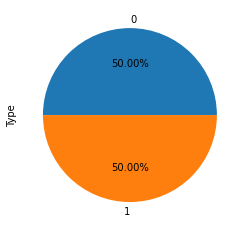

In [142]:
dfnew.groupby("Win").size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.2f%%')

In [116]:
dfnew['Win'].value_counts()

0    5250
1    5250
Name: Win, dtype: int64

In [115]:
#splitting dataset into testing (20%) and training (80%)
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [117]:
def getAccuracy(model, x, y):
  y_pred=model.predict(x)

  return accuracy_score(y, y_pred)*100

In [118]:
def get_predect(pip,x_train, y_train,x_test,y):
  pip.fit(x_train, y_train)

# Predicting the Test set results
  y_pred = pip.predict(x_test)
  print(f'accuracy :{y_pred}')
  print( "\n" )
  acc=accuracy_score(y, y_pred)*100
  print(f'accuracy :{acc}')
  print( "\n" )
  return y_pred,acc

In [119]:
#Logistic Regression model
LR = Pipeline(
   [
       ("LR",LogisticRegression())
   ]
)
LR_yhat,LR_acc=get_predect(LR,x_train, y_train,x_test,y_test)


accuracy :[0 0 0 ... 0 0 0]


accuracy :56.095238095238095




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
news=list(LR_yhat)
yy = news.count(0)
zz = news.count(1)


In [123]:
yy

1306

In [124]:
#Support Vector machine model 
SVM = Pipeline(
   [
       ("SVM",svm.LinearSVC()),
   ]
)
SVM_yhat,SVM_acc=get_predect(SVM,x_train, y_train,x_test,y_test)


accuracy :[0 0 0 ... 0 0 0]


accuracy :56.095238095238095




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
news=list(SVM_yhat)
yy = news.count(0)
zz = news.count(1)

252

In [125]:
# DecisionTree model
DTC = Pipeline(
   [
       ("DTC",DecisionTreeClassifier())
   ]
)
DTC_yhat,DTC_acc=get_predect(DTC,x_train, y_train,x_test,y_test)


accuracy :[0 1 0 ... 0 1 0]


accuracy :68.47619047619048




In [66]:
news=list(DTC_yhat)
yy = news.count(0)
zz = news.count(1)

In [68]:
yy

1599

In [126]:
#Random Forest model
RFC = Pipeline(
   [
       ("RFC",RandomForestClassifier(n_estimators=5))
   ]
)
RFC_yhat,RFC_acc=get_predect(RFC,x_train, y_train,x_test,y_test)


accuracy :[0 1 0 ... 0 1 0]


accuracy :68.33333333333333




/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [127]:
#Gussian Naive Bays Model
GNB = Pipeline(
   [
       ("GNB",GaussianNB())
   ]
)
GNB_yhat,GNB_acc=get_predect(GNB,x_train, y_train,x_test,y_test)


accuracy :[0 0 0 ... 0 0 0]


accuracy :53.23809523809524




/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
#knn Model
from sklearn.neighbors import KNeighborsClassifier
KNN = Pipeline(
   [
       ("knn",KNeighborsClassifier(n_neighbors=5))
   ]
)
KNN_yhat,KNN_acc=get_predect(KNN,x_train, y_train,x_test,y_test)


accuracy :[1 1 1 ... 1 0 1]


accuracy :63.57142857142857




/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [143]:
using=dfnew['Win'].value_counts()

In [147]:
news=list(KNN_yhat)
yy = news.count(0)
zz = news.count(1)
if yy > zz:
  print("Trump win")
else:
  print("Biden win")


Biden win


In [137]:
bnnnnnnnnnnnnnnnnnnnnnnnnn

In [140]:
zz

1417